In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import LinearNDInterpolator
from tqdm import tqdm

In [2]:
ds = xr.open_dataset("combined_output_freq_c_1_tracer_WENO_regrid.nc", decode_times=False)

In [3]:
ds

<xarray.Dataset>
Dimensions:                   (time: 401, y_afa: 262, x_faa: 262, x_caa: 262,
                               y_aca: 262, z_aac: 1, z_aaf: 1)
Coordinates:
  * time                      (time) float64 0.0 0.1 0.2 0.3 ... 39.8 39.9 40.0
  * y_afa                     (y_afa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_faa                     (x_faa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_caa                     (x_caa) float32 -0.06136 -0.03682 ... 6.32 6.345
  * y_aca                     (y_aca) float32 -0.06136 -0.03682 ... 6.32 6.345
  * z_aac                     (z_aac) float32 0.0
  * z_aaf                     (z_aaf) float32 0.0
Data variables: (12/25)
    dx_caa                    float32 ...
    dx_faa                    float32 ...
    dy_aca                    float32 ...
    dy_afa                    float32 ...
    dz_aac                    float32 ...
    dz_aaf                    float32 ...
    ...                        ...
    ω_filtered                (time, z_aac, y_aca, x_caa) float64 ...
    T_filtered                (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid         (time, z_aac, y_aca, x_caa) float64 ...
    T_filtered_regrid         (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid_python  (time, z_aac, y_aca, x_caa) float64 ...
    T_filtered_regrid_python  (time, z_aac, y_aca, x_caa) float64 ...
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

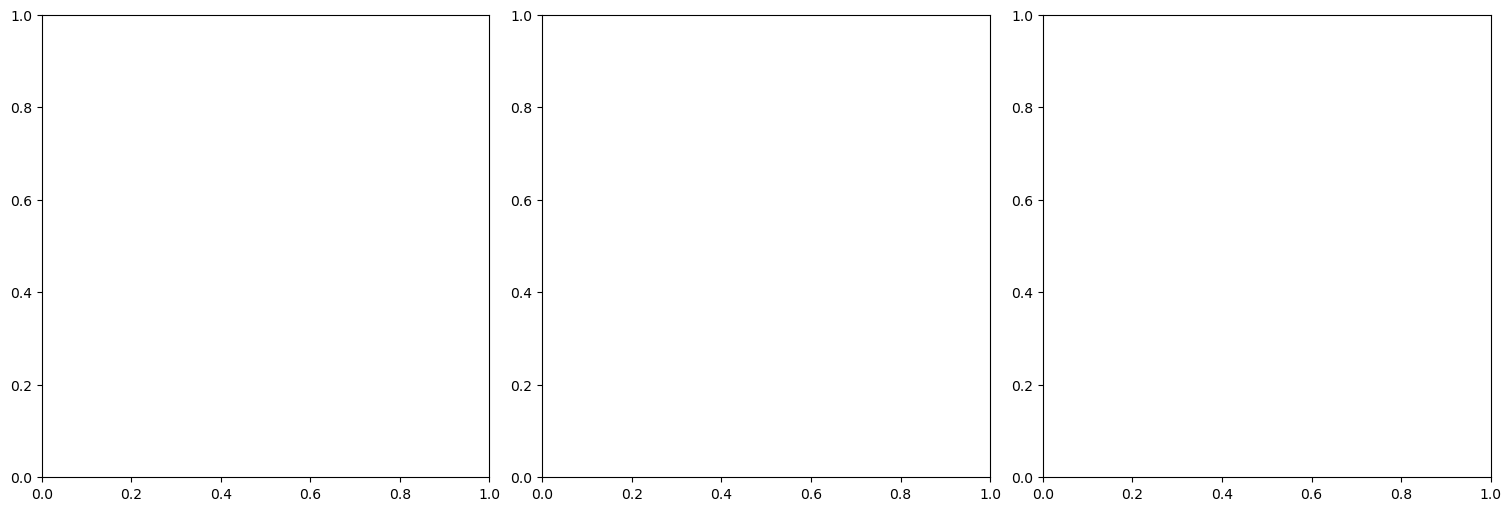

In [4]:
fig, ax = plt.subplots(1,3, figsize = (15,5), constrained_layout=True)
Hx = 3
Hy = 3
for it in range(400):
    fig, ax = plt.subplots(1,3, figsize = (15,5), constrained_layout=True)
    ds.ω[it,0,Hy:-Hy,Hx:-Hx].plot(ax=ax[0], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
    ds.ω_filtered[it,0,Hy:-Hy,Hx:-Hx].plot(ax=ax[1], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
    ds.ω_filtered_regrid_python[it,0,Hy:-Hy,Hx:-Hx].plot(ax=ax[2], vmin=0, vmax=1, cmap='Spectral_r')
    [ax[i].set_xlabel('') for i in range(3)];
    [ax[i].set_ylabel('') for i in range(3)];     
    ax[0].set_title('Julia')       
    ax[1].set_title('Python')       
    ax[2].set_title('Diff')       
    plt.savefig(f"../plots/vorticity_filtered_WENO{it:03d}.png")
    plt.close()

In [119]:
ds

<xarray.Dataset>
Dimensions:                   (time: 401, y_afa: 262, x_faa: 262, x_caa: 262,
                               y_aca: 262, z_aac: 1, z_aaf: 1)
Coordinates:
  * time                      (time) float64 0.0 0.1 0.2 0.3 ... 39.8 39.9 40.0
  * y_afa                     (y_afa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_faa                     (x_faa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_caa                     (x_caa) float32 -0.06136 -0.03682 ... 6.32 6.345
  * y_aca                     (y_aca) float32 -0.06136 -0.03682 ... 6.32 6.345
  * z_aac                     (z_aac) float32 0.0
  * z_aaf                     (z_aaf) float32 0.0
Data variables: (12/25)
    dx_caa                    float32 0.0
    dx_faa                    float32 ...
    dy_aca                    float32 0.0
    dy_afa                    float32 ...
    dz_aac                    float32 ...
    dz_aaf                    float32 ...
    ...                        ...
    ω_filtered                (time, z_aac, y_aca, x_caa) float64 ...
    T_filtered                (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid         (time, z_aac, y_aca, x_caa) float64 ...
    T_filtered_regrid         (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid_python  (time, z_aac, y_aca, x_caa) float64 0.0 ... 0.0
    T_filtered_regrid_python  (time, z_aac, y_aca, x_caa) float64 0.0 ... 0.0
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

In [5]:
import os
# Run ffmpeg command to make the plots. Change crf value for different file size, 23 default, 28 low quality, 21 higher quality, etc
os.system(f'ffmpeg -framerate 20 -start_number 0 -i ' + f'../plots/vorticity_filtered_WENO%03d.png -crf 23 -pix_fmt yuv420p ' + f'../plots/vorticity_movie_WENO.mp4')

# Could remove the plots (but might be worth keeping until you’re happy with the video)
#os.system('rm ' + f'plots/python_julia_regrid_*.png')

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


0

In [108]:
ds = xr.open_dataset("combined_output_freq_c_1_tracer_WENO.nc", decode_times=False)

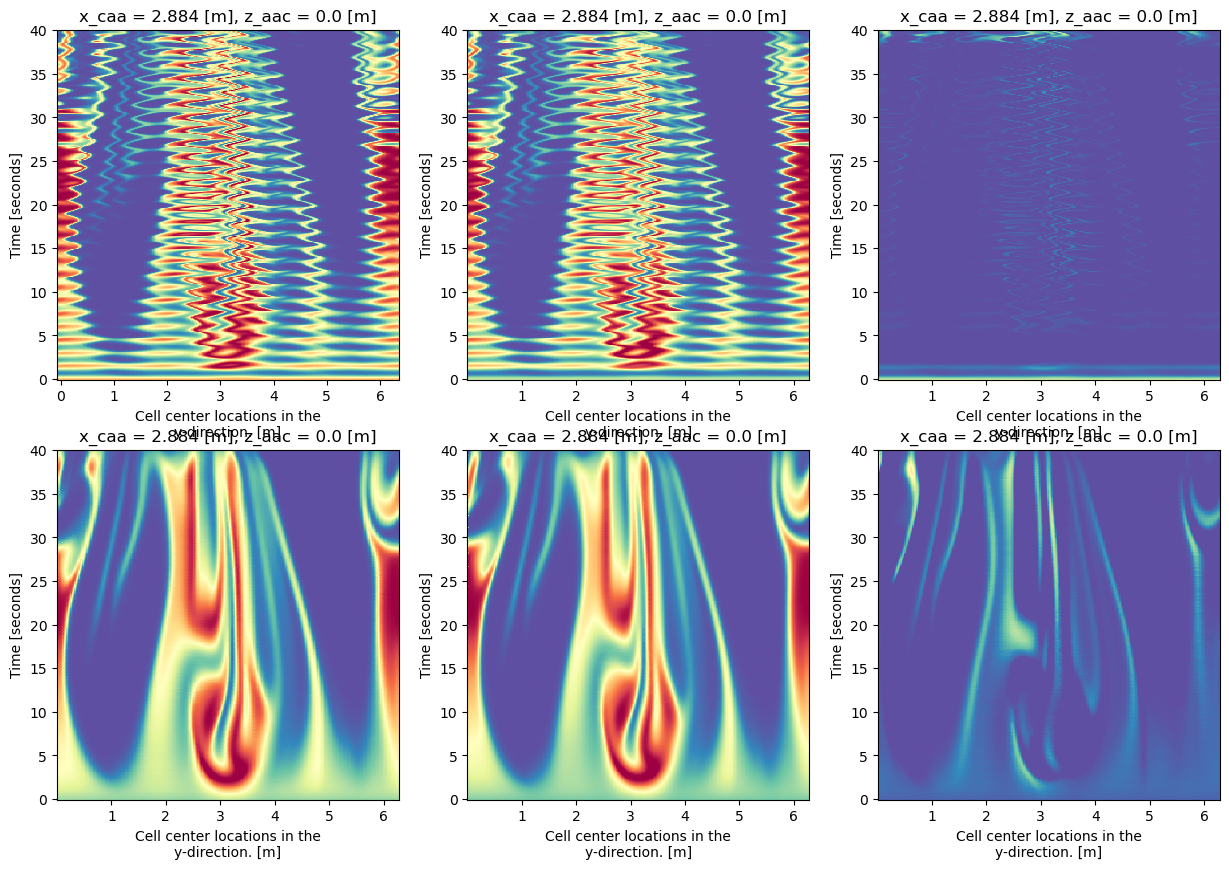

In [121]:
fig, ax = plt.subplots(2,3, figsize = (15,10))
ix = 120
ds.T[:,0,:,ix].plot(ax=ax[0,0], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
ds.T_filtered[:,0,Hy:-Hy,ix].plot(ax=ax[0,1], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
(ds.T - ds.T_filtered)[:,0,Hy:-Hy,ix].plot(ax=ax[0,2], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
ds.T_filtered_regrid[:,0,Hy:-Hy,ix].plot(ax=ax[1,0], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
ds.T_filtered_regrid_python[:,0,Hy:-Hy,ix].plot(ax=ax[1,1], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)
(ds.T_filtered_regrid - ds.T_filtered_regrid_python)[:,0,Hy:-Hy,ix].plot(ax=ax[1,2], vmin=0, vmax=1, cmap='Spectral_r',add_colorbar=False)

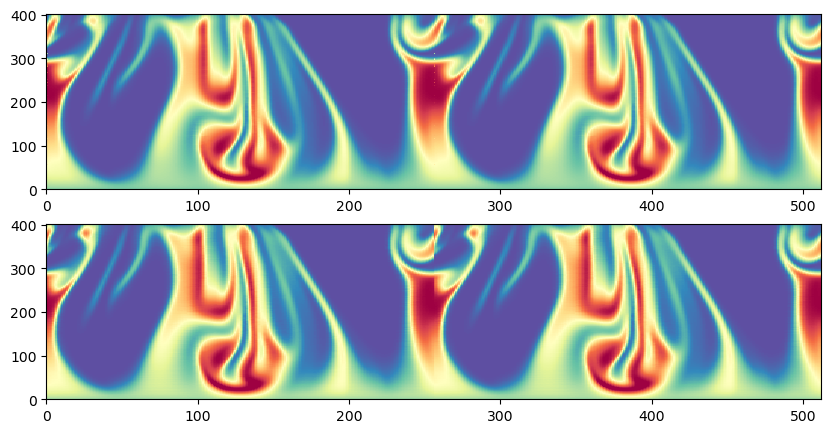

In [127]:
python_regrid = ds.T_filtered_regrid_python[:,0,Hy:-Hy,ix].values
julia_regrid = ds.T_filtered_regrid[:,0,Hy:-Hy,ix].values
fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].pcolormesh(np.concatenate((python_regrid, python_regrid), axis=1), cmap='Spectral_r', vmin=0, vmax=1)
ax[1].pcolormesh(np.concatenate((julia_regrid, julia_regrid), axis=1), cmap='Spectral_r', vmin=0, vmax=1)

In [126]:
Hx= ds.Hx.values
Hy= ds.Hy.values
x = ds.x_caa[Hx:-Hx]
y = ds.y_aca[Hy:-Hy]
dx = ds.dx_caa.values
dy = ds.dy_aca.values
Lx = ds.Lx.values
Ly = ds.Ly.values
npad = 4
for var_name in ['ω','T']:
    ds[var_name + '_filtered_regrid_python'] = ds.xi_u.copy(data=np.zeros_like(ds.xi_u.values))
    for it in tqdm(range(ds.time.shape[0])):
        ds_it = ds.isel({'time':it})
        mapxr = ds_it.xi_u[0,Hy:-Hy,Hx:-Hx] + x
        mapyr = ds_it.xi_v[0,Hy:-Hy,Hx:-Hx] + y
        xx_loc = (mapxr - ds_it.xi_u[0,Hy:-Hy,Hx:-Hx]) #trick to get meshgrid of x and y
        yy_loc = (mapyr - ds_it.xi_v[0,Hy:-Hy,Hx:-Hx])
        # x and y are periodic coordinate
        mapxr -= np.floor((mapxr - x[0]) / Lx) * Lx
        mapyr -= np.floor((mapyr - y[0]) / Ly) * Ly
        mapxr_ravel = np.ravel(mapxr)
        mapyr_ravel = np.ravel(mapyr)
        scalar_ravel = np.ravel(ds_it[var_name + '_filtered'][0,Hy:-Hy,Hx:-Hx])
        #Let's pad to avoid interpolation issues at the edges

        # First in x
        mapxr_extra_x = mapxr_ravel[(mapxr_ravel < dx*npad) | (mapxr_ravel > Lx - dx*npad) ]
        mapyr_extra_x = mapyr_ravel[(mapxr_ravel < dx*npad) | (mapxr_ravel > Lx - dx*npad) ]
        scalar_extra_x = scalar_ravel[(mapxr_ravel < dx*npad) | (mapxr_ravel > Lx - dx*npad) ]

        mapxr_extra_x[mapxr_extra_x < dx*npad] += Lx
        mapxr_extra_x[mapxr_extra_x > Lx - dx*npad] -= Lx
        
        mapxr_ravel = np.concatenate((mapxr_ravel, mapxr_extra_x))
        mapyr_ravel = np.concatenate((mapyr_ravel, mapyr_extra_x))
        scalar_ravel = np.concatenate((scalar_ravel, scalar_extra_x))

        # Now in y
        mapxr_extra_y = mapxr_ravel[(mapyr_ravel < dy*npad) | (mapyr_ravel > Ly - dy*npad) ]
        mapyr_extra_y = mapyr_ravel[(mapyr_ravel < dy*npad) | (mapyr_ravel > Ly - dy*npad) ]
        scalar_extra_y = scalar_ravel[(mapyr_ravel < dy*npad) | (mapyr_ravel > Ly - dy*npad) ]

        mapyr_extra_y[mapyr_extra_y < dy*npad] += Ly
        mapyr_extra_y[mapyr_extra_y > Ly - dy*npad] -= Ly
        
        mapxr_ravel = np.concatenate((mapxr_ravel, mapxr_extra_y))
        mapyr_ravel = np.concatenate((mapyr_ravel, mapyr_extra_y))
        scalar_ravel = np.concatenate((scalar_ravel, scalar_extra_y))



        interp = LinearNDInterpolator(list(zip(mapyr_ravel,mapxr_ravel)),np.ravel(scalar_ravel))
        ds[var_name + '_filtered_regrid_python'][it,0,Hy:-Hy,Hx:-Hx] = interp(yy_loc, xx_loc)

100%|██████████| 401/401 [02:33<00:00,  2.61it/s]


In [ ]:
import os
# Run ffmpeg command to make the plots. Change crf value for different file size, 23 default, 28 low quality, 21 higher quality, etc
os.system(f'ffmpeg -framerate 20 -start_number 0 -i ' + f'plots/python_julia_regrid_%03d.png -crf 23 -pix_fmt yuv420p ' + f'plots/my_movie.mp4')

# Could remove the plots (but might be worth keeping until you’re happy with the video)
#os.system('rm ' + f'plots/python_julia_regrid_*.png')

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


0